In [119]:
import pymongo as mg
import pandas as pd

#### DDA 선결
- 분석 제공 대상 선정 : 컬럼 선택 기준 달라짐.
   - 환자 
   - 의사
   - 병원 운영 관리자
   - 보호자

In [120]:
df_ROS = pd.read_csv('../../../datasets/RecurrenceOfSurgery.csv')
df_ROS.head(2)

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0


In [121]:
df_ROS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1894 non-null   int64  
 1   환자ID                    1894 non-null   object 
 2   Large Lymphocyte        1894 non-null   float64
 3   Location of herniation  1894 non-null   int64  
 4   ODI                     462 non-null    float64
 5   가족력                     1843 non-null   float64
 6   간질성폐질환                  1894 non-null   int64  
 7   고혈압여부                   1894 non-null   int64  
 8   과거수술횟수                  1894 non-null   int64  
 9   당뇨여부                    1894 non-null   int64  
 10  말초동맥질환여부                1894 non-null   int64  
 11  빈혈여부                    1894 non-null   int64  
 12  성별                      1894 non-null   int64  
 13  스테로이드치료                 1894 non-null   int64  
 14  신부전여부                   1894 non-null   

### 데이터 핸들링
 - 정렬 : df_ROS_.sort_values(by=[''],ascending=[False])
 - 추출
     - 열 단위 추출 : df[['','']],컬럼 리스트로 한다.
     - 행 단위 추출 : # iloc[:3] 0번째행 ~2행까지
 - 필터 : df.loc(conditions)
 - 요약 : pivot_table(index=, values=,aggfunc=)
    - index : group by
    - values : 대상 컬럼명
    - aggfunc : 집합 함수(from numpy)

### 환자 대상 분석 필요
 1. 목표 변수 설정 : '재발여부'정의 
 2. 설명 변수 설정 : '성별','신장','심혈관질환','체중','흡연여부','연령','직업','혈액형' 정의 


In [122]:
df_ROS.columns

Index(['Unnamed: 0', '환자ID', 'Large Lymphocyte', 'Location of herniation',
       'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부',
       '성별', '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '입원일자', '종양진행여부', '직업', '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도',
       '흡연여부', '통증기간(월)', '수술기법', '수술시간', '수술실패여부', '수술일자', '재발여부', '혈액형',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증'],
      dtype='object')

In [123]:
#'성별','신장','심혈관질환','체중','흡연여부','연령','직업','혈액형'
# 열 단위 추출

# df_ROS[['성별','신장', '심혈관질환','체중','흡연여부', '연령', '직업', '혈액형', '재발여부']]
df_ROS_forpatient = df_ROS[['성별','신장', '심혈관질환','체중','흡연여부', '연령', '직업', '혈액형', '재발여부']]
# df_ROS_forpatient.head(2)
df_ROS_forpatient.tail(3)

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
1891,1,167,0,70.0,0,61,무직,RH+O,0
1892,1,177,0,77.0,0,29,사무직,RH+A,0
1893,2,168,0,49.0,0,30,사무직,RH+AB,0


In [124]:
# 행단위 추출
#iloc[:,:], head() ,tail()
df_ROS_forpatient.iloc[:3] #[:3] 0번째행 ~2행까지

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
0,2,163,0,60.3,0,66,자영업,RH+A,0
1,1,171,0,71.7,0,47,운동선수,RH+A,0
2,1,178,0,77.1,0,39,특수전문직,RH+B,0


In [125]:
df_ROS_forpatient.iloc[-4:]

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
1890,2,157,0,59.0,0,42,사무직,RH+B,0
1891,1,167,0,70.0,0,61,무직,RH+O,0
1892,1,177,0,77.0,0,29,사무직,RH+A,0
1893,2,168,0,49.0,0,30,사무직,RH+AB,0


### index 관련 사항

In [126]:
df_ROS.set_index('환자ID') # 유닉크한 컬럼

,Unnamed: 0,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
환자ID,,,,,,,,,,,,,,,,,,,,,
1PT,0,22.8,3,51.0,0.0,0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.50,4,Down,0
2PT,1,44.9,4,26.0,0.0,0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.10,4,Up,0
3PT,2,53.0,3,NaN,0.0,0,0,1,0,0,...,0,67.5,27.3,10.2,0,-1.77,1749.00,4,Down,0
4PT,3,54.7,4,18.0,0.0,0,1,0,0,0,...,0,49.2,18.7,19.9,0,-1.58,1796.20,4,Down,0
5PT,4,53.8,4,NaN,0.0,0,1,0,0,0,...,0,58.8,14.7,5.2,0,-0.79,2021.48,4,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890PT,1889,44.0,1,NaN,0.0,0,0,0,0,0,...,2,59.5,23.0,21.8,0,NaN,2652.20,5,Middle,0
1891PT,1890,30.8,2,NaN,0.0,0,0,0,0,0,...,0,47.7,20.2,5.0,0,NaN,1795.80,4,Down,0
1892PT,1891,36.7,3,NaN,0.0,0,0,0,0,1,...,0,44.6,15.0,17.4,1,NaN,2624.40,4,Down,0


In [127]:
df_ROS.set_index('성별') # not unique column

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
성별,,,,,,,,,,,,,,,,,,,,,
2,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.50,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.10,4,Up,0
1,2,3PT,53.0,3,NaN,0.0,0,0,1,0,...,0,67.5,27.3,10.2,0,-1.77,1749.00,4,Down,0
1,3,4PT,54.7,4,18.0,0.0,0,1,0,0,...,0,49.2,18.7,19.9,0,-1.58,1796.20,4,Down,0
1,4,5PT,53.8,4,NaN,0.0,0,1,0,0,...,0,58.8,14.7,5.2,0,-0.79,2021.48,4,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,1889,1890PT,44.0,1,NaN,0.0,0,0,0,0,...,2,59.5,23.0,21.8,0,NaN,2652.20,5,Middle,0
2,1890,1891PT,30.8,2,NaN,0.0,0,0,0,0,...,0,47.7,20.2,5.0,0,NaN,1795.80,4,Down,0
1,1891,1892PT,36.7,3,NaN,0.0,0,0,0,0,...,0,44.6,15.0,17.4,1,NaN,2624.40,4,Down,0


In [128]:
df_ROS.iloc[-4:]

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
1890,1890,1891PT,30.8,2,NaN,0.0,0,0,0,0,...,0,47.7,20.2,5.0,0,NaN,1795.8,4,Down,0
1891,1891,1892PT,36.7,3,NaN,0.0,0,0,0,0,...,0,44.6,15.0,17.4,1,NaN,2624.4,4,Down,0
1892,1892,1893PT,32.5,2,NaN,0.0,0,0,0,0,...,2,32.2,11.1,17.7,0,NaN,1972.5,5,Down,0
1893,1893,1894PT,49.5,2,NaN,0.0,0,0,0,0,...,0,38.9,6.8,27.8,0,NaN,1574.4,5,Middle,0


In [129]:
### 정렬 - 신장에 따른 정렬 
df_ROS_forpatient.sort_values(by=['신장'])

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
1763,2,140,1,35.0,0,86,무직,RH+O,0
896,2,140,0,35.0,0,48,NaN,RH+A,0
348,2,142,0,52.9,0,38,자영업,RH+A,0
70,2,143,0,53.3,0,31,사무직,RH+O,0
974,2,143,0,56.0,0,56,무직,RH+O,0
...,...,...,...,...,...,...,...,...,...
202,1,189,0,85.3,0,22,군인,RH+B,0
464,1,189,0,85.9,0,39,자영업,RH+A,0
1227,1,190,0,74.0,0,47,자영업,RH+O,0
1246,1,191,0,114.0,0,17,학생,RH+O,0


In [130]:
df_ROS_forpatient.sort_values(by=['신장','체중'],ascending=[False,False])

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
1579,1,204,0,103.0,0,39,교사,RH+O,1
1246,1,191,0,114.0,0,17,학생,RH+O,0
1227,1,190,0,74.0,0,47,자영업,RH+O,0
464,1,189,0,85.9,0,39,자영업,RH+A,0
202,1,189,0,85.3,0,22,군인,RH+B,0
...,...,...,...,...,...,...,...,...,...
974,2,143,0,56.0,0,56,무직,RH+O,0
70,2,143,0,53.3,0,31,사무직,RH+O,0
348,2,142,0,52.9,0,38,자영업,RH+A,0
896,2,140,0,35.0,0,48,NaN,RH+A,0


In [131]:
## Quest1
## 혈액형(ascending) , 직업(desenging)
## 추출 : 혈액형, 직업, 성별 --> 표시 
df_ROS_forpatient2 = df_ROS[['혈액형','직업', '성별']]
df_ROS_forpatient2.sort_values(by=['혈액형','직업'],ascending=[True,False])
df_ROS_forpatient2.iloc[:5]

,혈액형,직업,성별
0,RH+A,자영업,2
1,RH+A,운동선수,1
2,RH+B,특수전문직,1
3,RH+O,주부,1
4,RH+A,특수전문직,1


## Quest2
- 직업군이 상위 2위에 속하는 항목 : value_count, DataFrame, iloc
- 체중 > 70, 신장 > 170, 흡연여부 없는 분
- 해당 레코드 갯수 표현


In [132]:
df_ROS_occupation = df_ROS_forpatient['직업'].value_counts().iloc[:2]
pd.DataFrame(df_ROS_occupation)

,직업
사무직,449
자영업,171


In [133]:
df_ROS_occupation.index[:2]

Index(['사무직', '자영업'], dtype='object')

In [134]:
df_ROS_occupation.index[0]

'사무직'

In [135]:
df_ROS_occupation.index[1]

'자영업'

In [136]:
condition = ((df_ROS_forpatient['직업'] == df_ROS_occupation.index[0]) | (df_ROS_forpatient['직업'] == df_ROS_occupation.index[1])) & (df_ROS_forpatient['체중'] > 70) & (df_ROS_forpatient['신장'] > 170) & (df_ROS_forpatient['흡연여부'] == 0)

In [137]:
df_ROS_forpatient.loc[condition]

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
23,1,179,1,77.8,0,42,사무직,RH+B,0
30,1,173,0,73.3,0,52,사무직,RH+O,0
40,1,182,0,80.2,0,50,사무직,RH+A,1
53,1,185,0,82.7,0,40,사무직,RH+O,0
72,1,171,0,72.1,0,30,자영업,RH+A,0
...,...,...,...,...,...,...,...,...,...
1830,1,176,0,80.0,0,32,자영업,RH+O,0
1841,1,175,0,99.0,0,32,자영업,RH+A,1
1855,1,187,0,74.0,0,29,사무직,RH+B,0
1871,1,177,0,82.0,0,47,사무직,RH+B,0


In [138]:
df_ROS_records = len(df_ROS_forpatient.loc[condition])
df_ROS_records

164

## Quest3
 - quest2 집합 구성하기
   - 요약 : pivot_table(index=, values=,aggfunc=)
    - index : group by
    - values : 대상 컬럼명
    - aggfunc : 집합 함수(from numpy)

In [139]:
filtered_df = df_ROS_forpatient.loc[condition]

pivot_table = pd.pivot_table(filtered_df, index=['직업', '성별'], aggfunc='size')  #직업별 성별 , 빈도
pd.DataFrame(pivot_table)

0
직업  성별     
사무직 1   121
    2     4
자영업 1    39

In [140]:
filtered_df = df_ROS_forpatient.loc[condition]

pivot_table = pd.pivot_table(filtered_df, index=['직업', '혈액형'], aggfunc='size' )  #직업별 혈액형 , 빈도
pd.DataFrame(pivot_table)

0
직업  혈액형      
사무직 RH+A   50
    RH+AB  13
    RH+B   24
    RH+O   38
자영업 RH+A   21
    RH+AB   3
    RH+B    8
    RH+O    7

In [141]:
filtered_df = df_ROS_forpatient.loc[condition]
pivot_table=filtered_df.pivot_table(index='성별',  columns='직업',aggfunc='size',fill_value=0)  #직업별 성별 , 빈도
pivot_table

직업,사무직,자영업
성별,,
1,121,39
2,4,0


In [142]:
filtered_df = df_ROS_forpatient.loc[condition]
pivot_table=filtered_df.pivot_table(index='혈액형',  columns='직업',aggfunc='size')  #직업별 혈액형 , 빈도
pivot_table

직업,사무직,자영업
혈액형,,
RH+A,50,21
RH+AB,13,3
RH+B,24,8
RH+O,38,7


## Quest4
 -  분석 제공 대상이 의사
- 목표 변수 : '수술시간'
- 설명 변수 지정 최소 5개 이상(범주형과 연속형 섞여 있음)
- DDA/README.md : 변수 설명/데이터 type/이유
- 추출, 수술시간이 중앙값 이상인 것.
- 요약 : 수술시간에 가장 영향을 주는 항목 3가지 확인

In [143]:
df_ROS_forpatient = df_ROS[['수술시간','연령', '디스크단면적','수술기법','디스크위치']]
pd.DataFrame(df_ROS_forpatient)

,수술시간,연령,디스크단면적,수술기법,디스크위치
0,68.0,66,2048.50,TELD,4
1,31.0,47,1753.10,TELD,4
2,78.0,39,1749.00,TELD,4
3,73.0,40,1796.20,TELD,4
4,29.0,42,2021.48,TELD,4
...,...,...,...,...,...
1889,80.0,59,2652.20,NaN,5
1890,20.0,42,1795.80,NaN,4
1891,50.0,61,2624.40,IELD,4
1892,25.0,29,1972.50,NaN,5


In [144]:
median_operation_time = df_ROS_forpatient['수술시간'].median()   
median_operation_time   #평균 수술시간 : 60 

60.0

In [145]:
filtered_df = df_ROS_forpatient[df_ROS_forpatient['수술시간'] > median_operation_time]
filtered_df # 수술시간이 중앙값 이상인 것 추출

,수술시간,연령,디스크단면적,수술기법,디스크위치
0,68.0,66,2048.50,TELD,4
2,78.0,39,1749.00,TELD,4
3,73.0,40,1796.20,TELD,4
7,85.0,55,1830.58,TELD,4
12,94.0,35,1915.80,TELD,4
...,...,...,...,...,...
1876,110.0,64,2166.30,NaN,5
1877,90.0,51,3182.20,NaN,5
1885,70.0,42,2294.10,NaN,4
1887,75.0,34,1858.10,NaN,5


In [146]:
filtered_df
pivot_table=filtered_df.pivot_table(index='수술시간',  columns='수술기법',aggfunc='size',fill_value=0)  
pivot_table

수술기법,IELD,TELD
수술시간,,
61.0,3,17
62.0,0,15
63.0,0,16
64.0,0,12
65.0,3,46
...,...,...
152.0,0,1
155.0,0,1
165.0,0,1


In [147]:
avg_operation_time_by_technique2 = filtered_df.groupby('수술기법')['수술시간'].mean()

In [148]:
# longest_technique = avg_operation_time_by_technique2.idxmax()
# pd.DataFrame(longest_technique)

In [149]:
avg_operation_time_by_technique = filtered_df.groupby(['수술기법','연령','디스크단면적','디스크위치'])['수술시간'].mean()

In [150]:
longest_technique = avg_operation_time_by_technique.idxmax()
pd.DataFrame(longest_technique)

,0
0,IELD
1,41
2,1739.53
3,5


## Quest5 
- 분석 대상 : 성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
- 단일 변수 chart 각각 작성
- 이상치와 결측치가 없는 데이터셋 만들기

In [151]:
df_ROS_q5 = df_ROS[['성별','신장', '심혈관질환','체중','흡연여부','연령','직업','혈액형','재발여부',]]

In [152]:
df_ROS_q5.value_counts()

성별  신장   심혈관질환  체중    흡연여부  연령  직업   혈액형   재발여부
1   167  0      61.0  0     57  무직   RH+O  0       2
    180  0      86.0  1     30  의료직  RH+O  1       2
    174  0      78.0  0     39  사무직  RH+A  0       2
    152  0      56.0  0     60  농업   RH+A  0       1
2   152  1      50.0  0     66  무직   RH+B  0       1
                                                  ..
1   174  0      74.0  0     23  군인   RH+O  0       1
                73.9  0     30  예술가  RH+A  0       1
                73.8  1     30  예술가  RH+O  0       1
                      0     37  군인   RH+A  0       1
2   174  0      77.0  0     38  사무직  RH+A  0       1
Length: 1476, dtype: int64

In [153]:
df_ROS_q5.describe(include=object) #범주형 : 직업 , 혈액형

,직업,혈액형
count,1479,1894
unique,17,4
top,사무직,RH+A
freq,449,688


In [154]:
df_ROS_q5.describe(include=object).columns

Index(['직업', '혈액형'], dtype='object')

In [155]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')   #한글처리
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

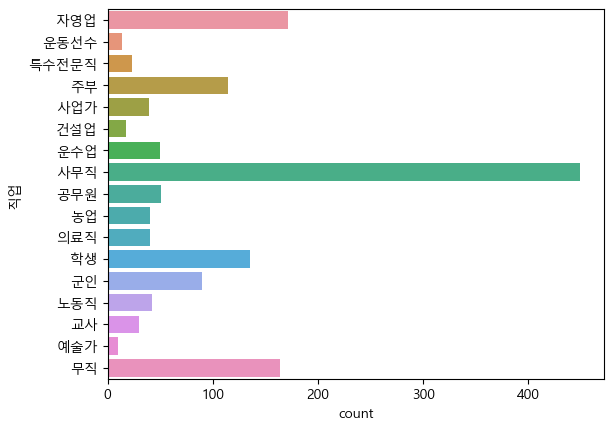

In [156]:
sns.countplot(data=df_ROS_q5, y='직업')   # 직업 차트 
plt.show 

<function matplotlib.pyplot.show(close=None, block=None)>

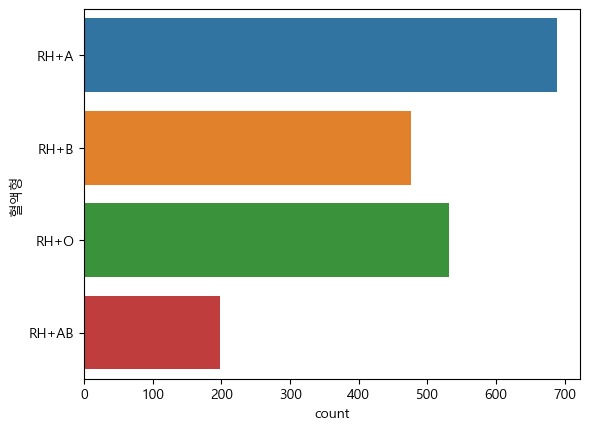

In [157]:
sns.countplot(data=df_ROS_q5, y='혈액형')   # 직업 차트 
plt.show 

In [158]:
df_ROS_q5.describe()  #연속형

,성별,신장,심혈관질환,체중,흡연여부,연령,재발여부
count,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000
mean,1.383316,168.027983,0.035903,68.111140,0.217001,41.463569,0.119852
std,0.486323,9.211419,0.186097,11.234318,0.412312,13.444629,0.324874
min,1.000000,140.000000,0.000000,35.000000,0.000000,15.000000,0.000000
25%,1.000000,161.000000,0.000000,59.700000,0.000000,32.000000,0.000000
50%,1.000000,169.000000,0.000000,68.000000,0.000000,41.000000,0.000000
75%,2.000000,175.000000,0.000000,75.000000,0.000000,49.000000,0.000000
max,2.000000,204.000000,1.000000,136.100000,1.000000,86.000000,1.000000


In [159]:
df_ROS_q5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1894 non-null   int64  
 1   신장      1894 non-null   int64  
 2   심혈관질환   1894 non-null   int64  
 3   체중      1894 non-null   float64
 4   흡연여부    1894 non-null   int64  
 5   연령      1894 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1894 non-null   object 
 8   재발여부    1894 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 133.3+ KB


In [160]:
df_ROS_q5.isnull()

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1889,False,False,False,False,False,False,False,False,False
1890,False,False,False,False,False,False,False,False,False
1891,False,False,False,False,False,False,False,False,False
1892,False,False,False,False,False,False,False,False,False


In [161]:
df_ROS_q5.isnull().sum()

성별         0
신장         0
심혈관질환      0
체중         0
흡연여부       0
연령         0
직업       415
혈액형        0
재발여부       0
dtype: int64

In [162]:
df_ROS_q5_dropna = df_ROS_q5.dropna()
df_ROS_q5_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1479 non-null   int64  
 1   신장      1479 non-null   int64  
 2   심혈관질환   1479 non-null   int64  
 3   체중      1479 non-null   float64
 4   흡연여부    1479 non-null   int64  
 5   연령      1479 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1479 non-null   object 
 8   재발여부    1479 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 115.5+ KB


In [163]:
df_ROS_q5_dropna.describe()

,성별,신장,심혈관질환,체중,흡연여부,연령,재발여부
count,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000
mean,1.375930,168.158891,0.037863,68.243070,0.212982,39.980392,0.119675
std,0.484526,9.250669,0.190930,11.426661,0.409553,13.314364,0.324691
min,1.000000,140.000000,0.000000,35.000000,0.000000,15.000000,0.000000
25%,1.000000,161.000000,0.000000,60.000000,0.000000,30.000000,0.000000
50%,1.000000,169.000000,0.000000,67.800000,0.000000,39.000000,0.000000
75%,2.000000,175.000000,0.000000,75.150000,0.000000,47.000000,0.000000
max,2.000000,204.000000,1.000000,136.100000,1.000000,86.000000,1.000000


In [164]:
df_ROS_q5_dropna.describe().columns

Index(['성별', '신장', '심혈관질환', '체중', '흡연여부', '연령', '재발여부'], dtype='object')

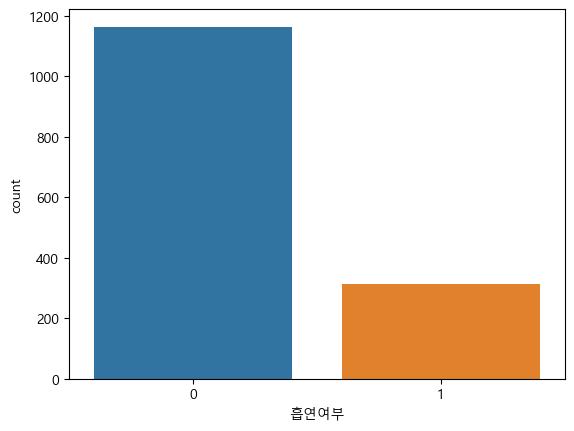

In [178]:
sns.countplot(df_ROS_q5_dropna,x='흡연여부')
plt.show()

<Axes: xlabel='심혈관질환', ylabel='count'>

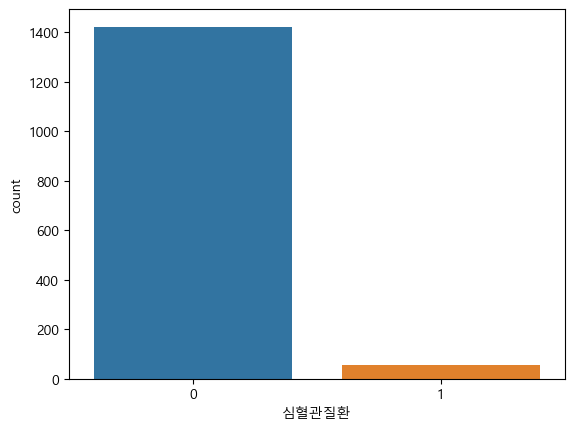

In [179]:
sns.countplot(df_ROS_q5_dropna,x='심혈관질환')

<Axes: xlabel='성별', ylabel='count'>

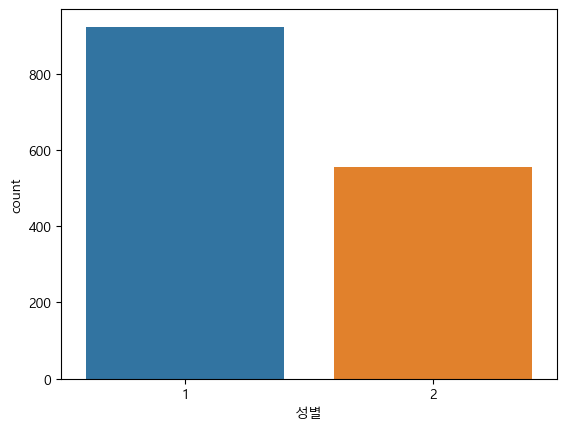

In [180]:
sns.countplot(df_ROS_q5_dropna,x='성별')

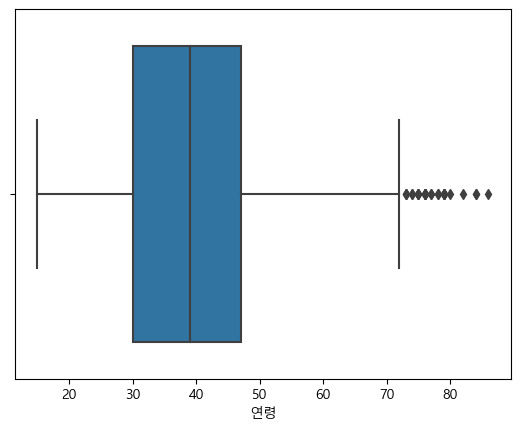

In [181]:
sns.boxplot(df_ROS_q5_dropna,x='연령')
plt.show()

In [193]:
df_ROS_q5_dropna['연령'].value_counts()

39    68
38    59
47    58
46    55
45    53
      ..
82     1
71     1
15     1
86     1
80     1
Name: 연령, Length: 68, dtype: int64

In [184]:
df_ROS_q5_dropna['연령'].describe()

count    1479.000000
mean       39.980392
std        13.314364
min        15.000000
25%        30.000000
50%        39.000000
75%        47.000000
max        86.000000
Name: 연령, dtype: float64

In [185]:
# Q1, Q3 구함
Q1 = df_ROS_q5_dropna['연령'].describe()['25%']
Q3 = df_ROS_q5_dropna['연령'].describe()['75%']
IQR = Q3-Q1
bound_up = Q3 + 1.5 * IQR
bound_low = Q1 - 1.5 * IQR
# filter
condition = (df_ROS_q5_dropna['연령'] <= bound_up) #긍정 조건 변환
df_ROS_q5_condition = df_ROS_q5_dropna[condition]

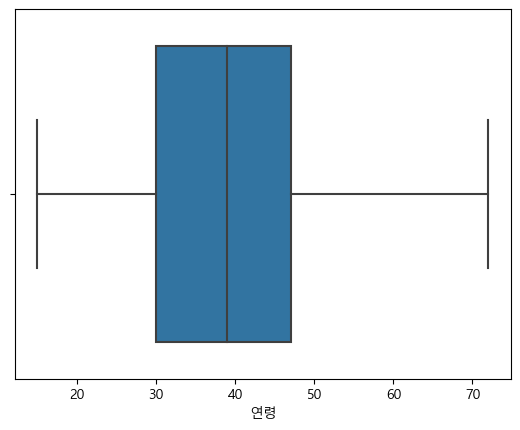

In [192]:
sns.boxplot(df_ROS_q5_condition,x='연령')
plt.show()

<Axes: xlabel='신장', ylabel='Count'>

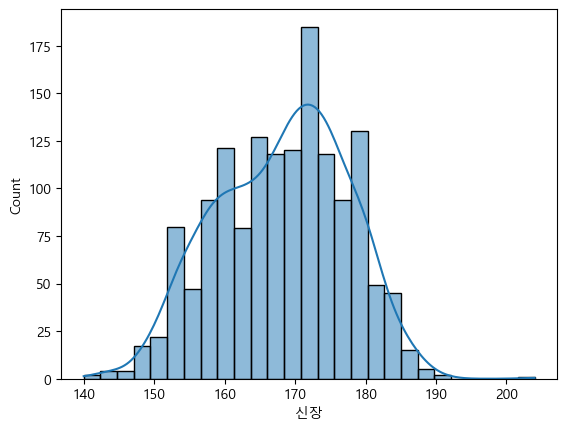

In [196]:
sns.histplot(df_ROS_q5_dropna,kde=True,x='신장')

<Axes: xlabel='체중', ylabel='Count'>

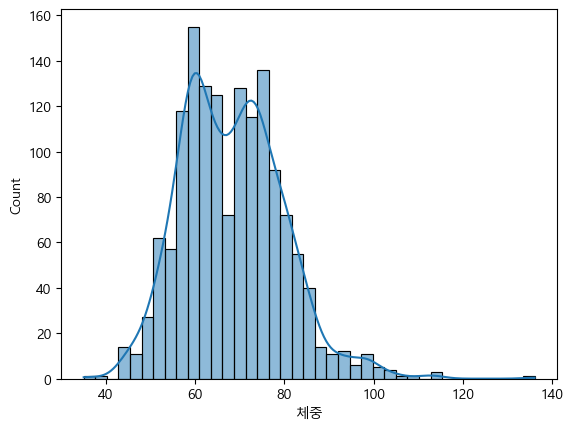

In [195]:
sns.histplot(df_ROS_q5_dropna,kde=True,x='체중')

### Quest6 0811
- apply() 이용
- 대상 컬럼 : 연령 --> 연령(중앙값) 차이
- 중앙값 - 개인 연령 = cell 작성

In [218]:
df_ROS_age = df_ROS['연령']
pd.DataFrame(df_ROS_age)

,연령
0,66
1,47
2,39
3,40
4,42
...,...
1889,59
1890,42
1891,61
1892,29


In [219]:
df_ROS_age_M = df_ROS['연령'].mean()  #연령 중앙값
df_ROS_age_M 

41.463569165786694

In [220]:
def mean_subtraction(cell_value) : 
    result = df_ROS_age_M  - cell_value   #중앙값 - 개별값
    return result 

In [221]:
df_ROS['연령'].apply(mean_subtraction)

0      -24.536431
1       -5.536431
2        2.463569
3        1.463569
4       -0.536431
          ...    
1889   -17.536431
1890    -0.536431
1891   -19.536431
1892    12.463569
1893    11.463569
Name: 연령, Length: 1894, dtype: float64

In [230]:
df_ROS['연령차이'] = df_ROS_age .apply(mean_subtraction)

In [233]:
df_ROS

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증,연령차이
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,51.6,36.6,14.4,0,-1.01,2048.50,4,Down,0,-24.536431
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,40.8,7.2,17.8,0,-1.14,1753.10,4,Up,0,-5.536431
2,2,3PT,53.0,3,NaN,0.0,0,0,1,0,...,67.5,27.3,10.2,0,-1.77,1749.00,4,Down,0,2.463569
3,3,4PT,54.7,4,18.0,0.0,0,1,0,0,...,49.2,18.7,19.9,0,-1.58,1796.20,4,Down,0,1.463569
4,4,5PT,53.8,4,NaN,0.0,0,1,0,0,...,58.8,14.7,5.2,0,-0.79,2021.48,4,Up,0,-0.536431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1889,1890PT,44.0,1,NaN,0.0,0,0,0,0,...,59.5,23.0,21.8,0,NaN,2652.20,5,Middle,0,-17.536431
1890,1890,1891PT,30.8,2,NaN,0.0,0,0,0,0,...,47.7,20.2,5.0,0,NaN,1795.80,4,Down,0,-0.536431
1891,1891,1892PT,36.7,3,NaN,0.0,0,0,0,0,...,44.6,15.0,17.4,1,NaN,2624.40,4,Down,0,-19.536431
1892,1892,1893PT,32.5,2,NaN,0.0,0,0,0,0,...,32.2,11.1,17.7,0,NaN,1972.50,5,Down,0,12.463569
